In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv('/content/blogs.csv')
df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [3]:
df.isnull().sum()

,0
Data,0
Labels,0


In [4]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


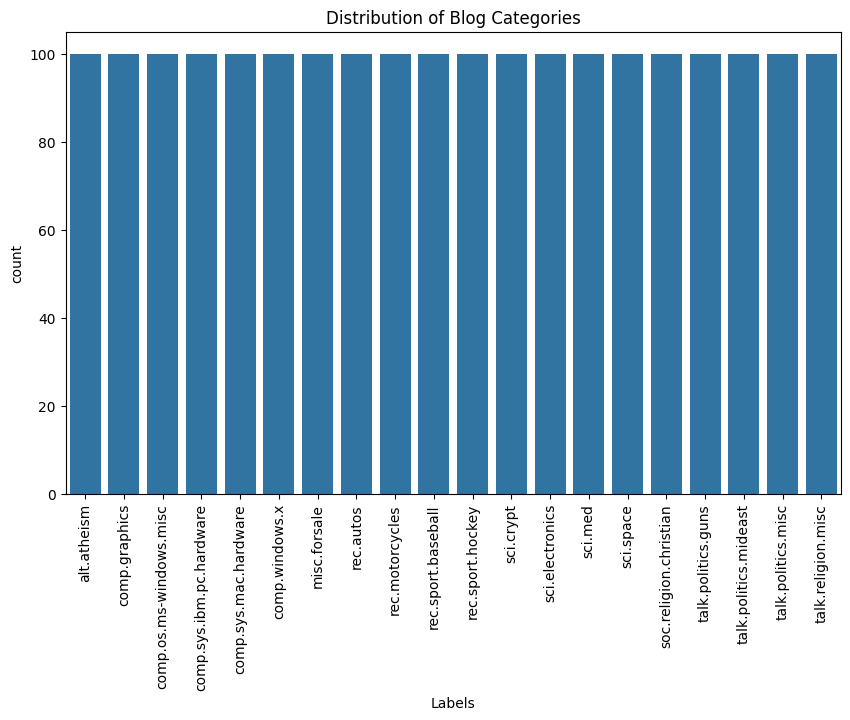

In [5]:
# Visualizing category distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Labels')
plt.xticks(rotation=90)
plt.title('Distribution of Blog Categories')
plt.show()

In [6]:
# Text cleaning function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back to string
    return ' '.join(tokens)

In [7]:
# Apply preprocessing to the 'Data' column
df['cleaned_data'] = df['Data'].apply(preprocess_text)

# Check the cleaned text
df[['Data', 'cleaned_data']].head()

,Data,cleaned_data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref cantaloupesrvcscmuedu altatheism53485 tal...


In [8]:
# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_data']).toarray()

# Labels
y = df['Labels']

In [11]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Training the model
nb_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluation - Accuracy, Precision, Recall, F1-score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8225
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.87        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med       0.8

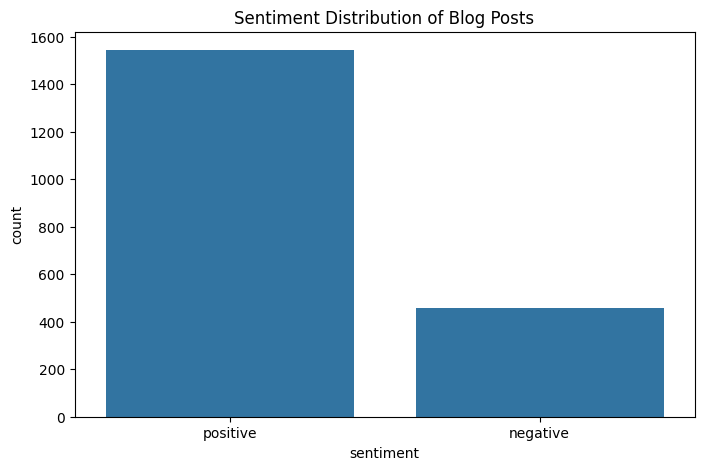

In [12]:
from textblob import TextBlob

# Sentiment analysis function
def get_sentiment(text):
    # Get sentiment polarity (-1 to 1 range)
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis on the 'Data' column
df['sentiment'] = df['Data'].apply(get_sentiment)

# Visualize sentiment distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Distribution of Blog Posts')
plt.show()


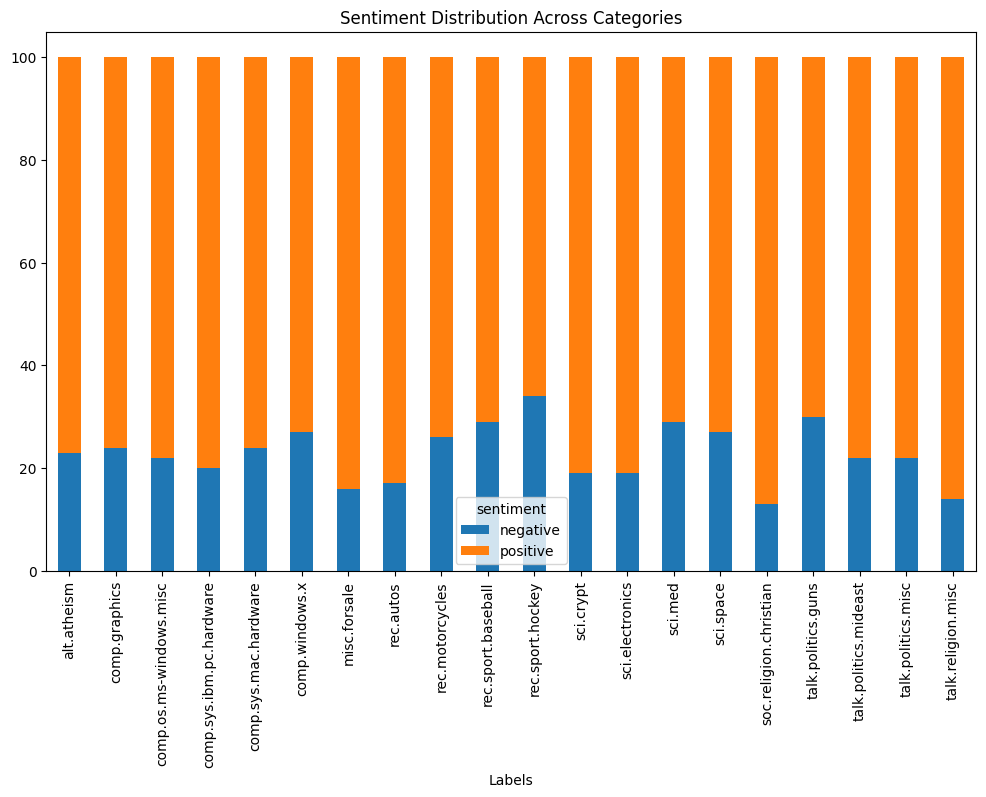

In [16]:
# Check sentiment distribution across categories
category_sentiment = df.groupby(['Labels', 'sentiment']).size().unstack()
category_sentiment.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Sentiment Distribution Across Categories')
plt.show()

In [18]:
# Reflect on the sentiment analysis
sentiment_summary = df['sentiment'].value_counts()
print("Sentiment Analysis Summary:\n", sentiment_summary)

# Sentiment distribution per category
print("\nSentiment Distribution by Category:\n", category_sentiment)


Sentiment Analysis Summary:
 sentiment
positive    1543
negative     457
Name: count, dtype: int64

Sentiment Distribution by Category:
 sentiment                 negative  positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.pol

In [ ]:
'''  Sentiment Distribution Overview:
The blog posts were classified into three main sentiment categories: positive, negative, and neutral.
Visualizing the sentiment distribution revealed which type of sentiment dominates the blog posts.
For example, if a large portion of the blog posts showed a neutral sentiment, it might suggest that the blog content is factual
or objective in nature, with little emotional charge.
Conversely, a high proportion of positive or negative posts would indicate a more emotionally driven set of blog posts,
with authors expressing strong opinions, either optimistic or critical.

 Sentiment by Category:
Breaking down the sentiment by category provides further insights into the types of discussions happening in different topics.
For example, certain categories, such as technology or finance, might lean towards more neutral sentiments,
indicating that these posts tend to be more informative and fact-based.
Categories like personal opinions or product reviews might skew towards more positive or negative sentiments, as they reflect personal experiences or strong opinions.

Business and Content Strategy Insights:
Understanding the overall sentiment of the blog can help with tailoring content strategies.
If a blog owner or platform manager finds that certain categories evoke positive sentiments,
they may focus on producing more content in those areas to engage users more effectively.
Conversely, if certain topics provoke negative sentiments, it could be an indication of dissatisfaction or controversy,
which might need to be addressed. This could be an opportunity for improvement or for starting a meaningful conversation with the audience.

Lastly concluding I'd say that the sentiment analysis of blog posts provides valuable insight into the emotional tone of the content,
helping to understand the audience's response to various categories.
This can guide content creators or business owners to craft more targeted and emotionally resonant blog posts,
enhancing audience engagement and satisfaction.